## Изучение общей предоставленной информации

In [1]:
import pandas as pd # Импортировали библиотеку
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('games.csv')
data.head() # Открыли файл и ознакомились с ним

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info() # узнали общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Заменить названия столбцов (привести к нижнему регистру)

In [4]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 
'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 
'EU_sales': 'eu_sales', 'JP_sales': 'gp_sales', 'Other_sales': 'other_sales', 
'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}) 
# Переименовали столбцы

In [5]:
data.head() # Проверили результаты

,name,platform,year_of_release,genre,na_sales,eu_sales,gp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Найти и изучить пропущенные значения в столбцах

In [6]:
data.isna().sum() # узнали количство пропусков в кажом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
gp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как видим, удаление пропущенных значений в столбцах name, year_of_release, genre не окажут существенного вляния на результаты исследования в силу их малого количества. genre

In [7]:
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True) 
# Удалили отсутствующие значения

In [8]:
data.isna().sum() # Проверили результат

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
gp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце user_score тип данных object. 

In [9]:
data['user_score'].sort_values().unique() # Проверим, какие уникальные значения есть в столбце

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Значение 'tbd' делает тип данных столбца object. Само значение 'tbd' образовалось в данном столбце скорее всего из - за человеческого фактора и данная аббревиатура означает, что 'значение не определено, но скоро будет'. Исходя из этого можно сделать вывод, что данные значения можно заменить значением Nan.

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'Nan' # Заменили значения на Nan

Отсутствующие значения в столбцах critic_score, user_score, rating скорее всего вызваны отсутствием их как таковых. Скорее всего оценка данных игр не была проведена либо только ожидается. 

Удалять отсутствующие значения в столбцах critic_score, user_score, rating не будем, так как потеряем большое количество данных

### Преобразуйте данные в нужные типы

Проверим, какие типы данных в столбцах

In [11]:
data.info() # проверили типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   gp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для удобства работы преобразуем значения в столбцах year_of_release и critic_score.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int') # Преобразовали в целочисленные данные

In [13]:
data['user_score'] = data['user_score'].astype('float64') # Преобразовали в вешественные данные

In [14]:
data.info() # проверили типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   gp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Создадим столбец с суммой продаж каждой игры во всех регионах total_sales.

In [15]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['gp_sales']+data['other_sales'] 
# Создаем столбец с рачетом суммы продаж

In [16]:
data.head() # Прверили результат

,name,platform,year_of_release,genre,na_sales,eu_sales,gp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Проводим исследовательский анализ данных

### Расчет количества игр по годам

Для расчета количества игр по годам сгруппируем данные в новой переменной games_per_year.

In [17]:
games_per_year = data.groupby('year_of_release')['name'].count() # Сгруппируем данные по годам

In [18]:
games_per_year # Выведем результаты

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

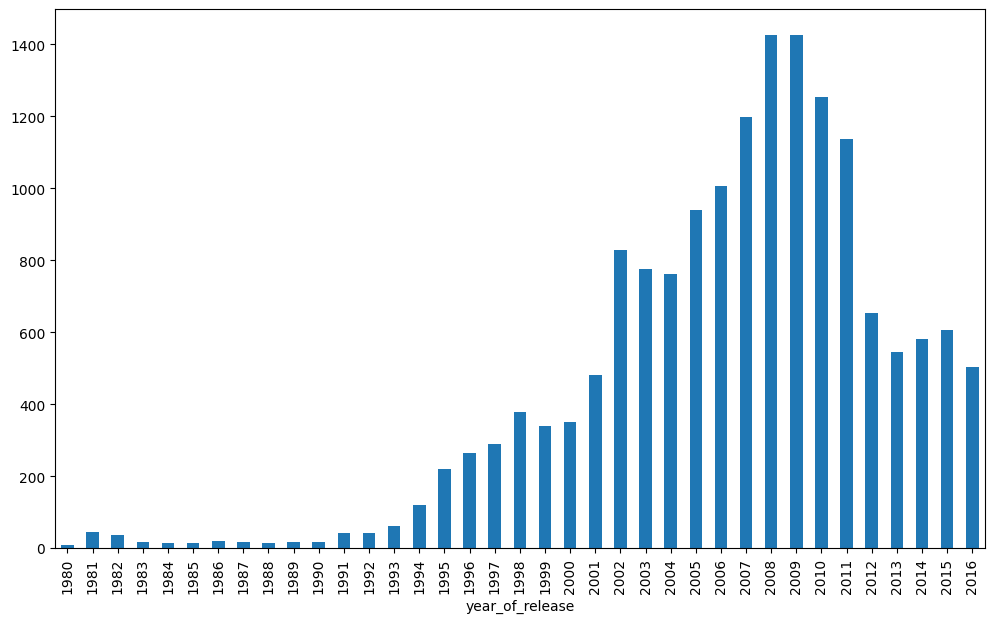

In [19]:
games_per_year.plot(kind='bar', figsize=(12,7)); # Построим график для лучшей визуализации.

Как видим из результатов, показатели количества игр по годам заметное увеличение по отношению к прошедшим годам с 1994 года. В года ранее 1994 издание игр было низким.

In [20]:
games_per_year[0:14].sum()/games_per_year.sum() 
# Расчитали примерное соотношение произведенных игр до 1993 года включительно к общему количеству вышедших игр

0.02219654585259061

Как видим из результатов, за период с 1980 по 1993 год количество игр от общего и количества составило чуть более 2%. Данные при исследовании до 1993 года включительно можно не использовать, так как не будет сильно влиять на результат исследования.

In [21]:
data = data.query('year_of_release > 1993') # Убрали малозначительные данные

### Расчитать, как менялись продажи по платформам

Выявим распределение платформ по суммарным продажам и сохраним результаты в переменной platform_total_sales

In [22]:
platform_total_sales = data.groupby('platform')['total_sales'].sum()

In [23]:
platform_total_sales.sort_values(ascending = False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

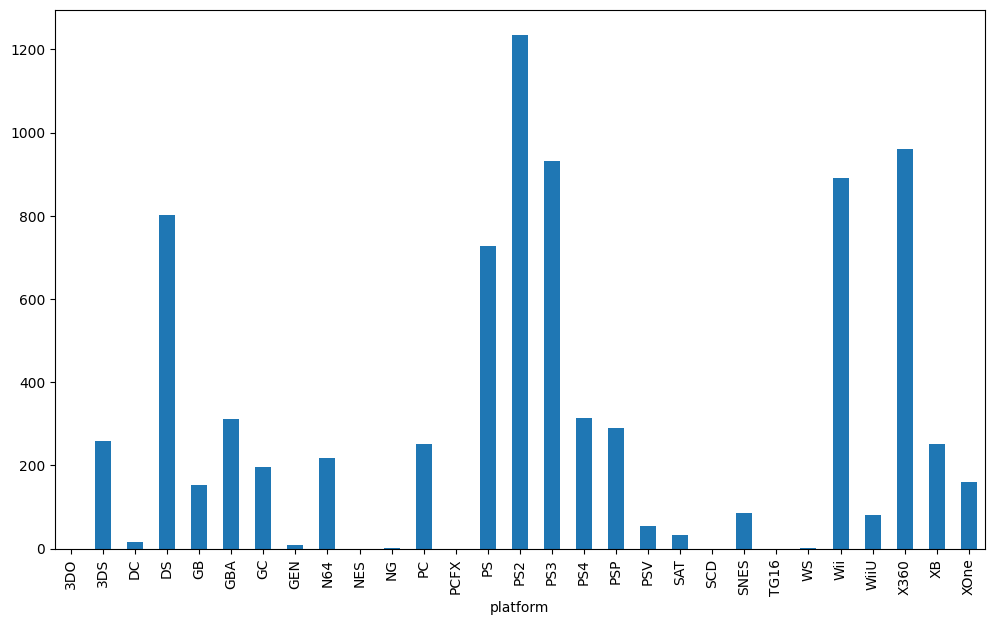

In [24]:
platform_total_sales.plot(kind='bar', figsize=(12,7)); # Визуализируем продажи по платформам

In [25]:
platform_total_sales.describe() # Узнали ориентировочные значения продаж игр по платформам. 

count      29.000000
mean      283.935862
std       357.075806
min         0.030000
25%         8.130000
50%       159.320000
75%       312.880000
max      1233.560000
Name: total_sales, dtype: float64

Исходя из полученных выше данных значительно выделяются от среднего показателя продаж такие платформы как: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Построим распределение продаж по годам в данных платформах.

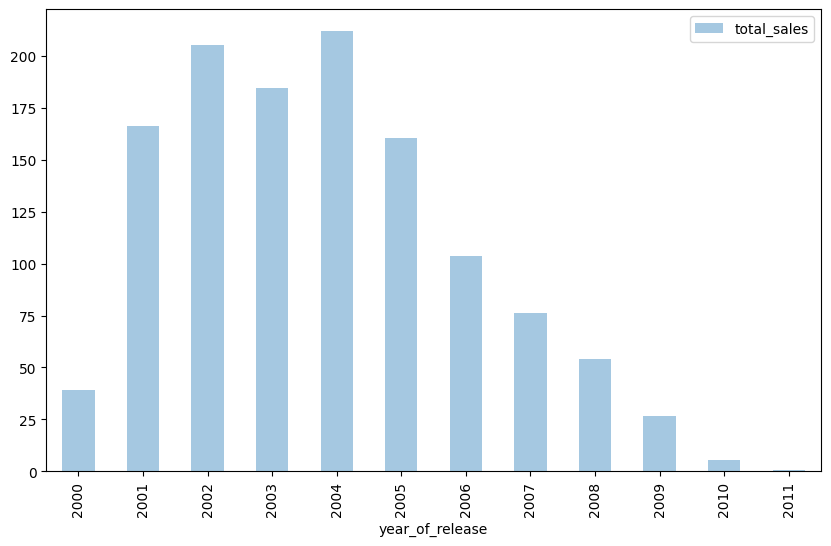

In [26]:
platform_pivot_ps2 = (
    data.query('platform == "PS2"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PS2
platform_pivot_ps2.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PS2       

In [27]:
platform_pivot_ps2 # Выведем конкретные числовые значения с продажами по годам платформы PS2 

,year_of_release,total_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


Исходя из полученных данных, время жизни данной платформы составляет около 12 лет. Наилучшие показатели продаж составили на 5 год существования данной платформы, а именно в 2004 году. Период значительного угасания продаж составляет примерно 5 лет.

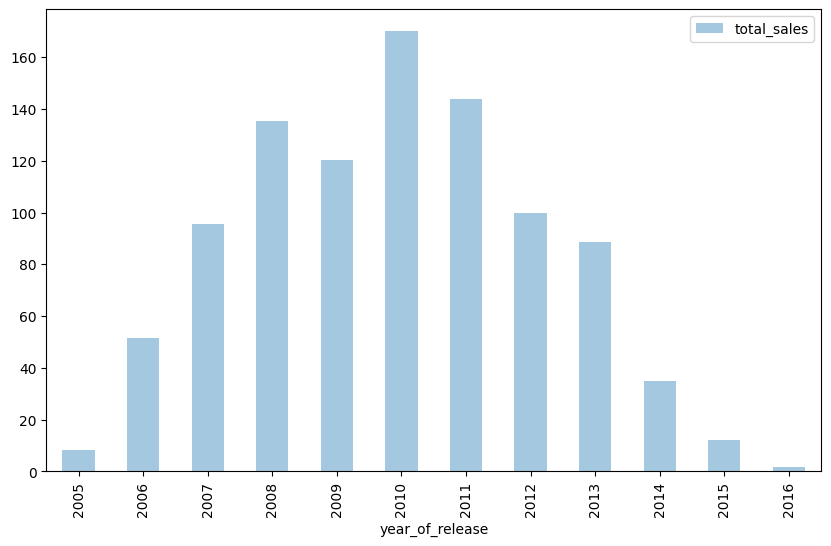

In [28]:
platform_pivot_x360 = (
    data.query('platform == "X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы X360
platform_pivot_x360.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы X360   

In [29]:
platform_pivot_x360 # Выведем конкретные числовые значения с продажами по годам платформы X360 

,year_of_release,total_sales
0,2005,8.25
1,2006,51.62
2,2007,95.41
3,2008,135.26
4,2009,120.29
5,2010,170.03
6,2011,143.84
7,2012,99.74
8,2013,88.58
9,2014,34.74


Исходя из полученных данных, время жизни данной платформы составляет около 12 лет. Наилучшие показатели продаж составили в 6 году существования данной платформы, а именно в 2010 году. Период значительного угасания продаж составляет примерно 3 года.

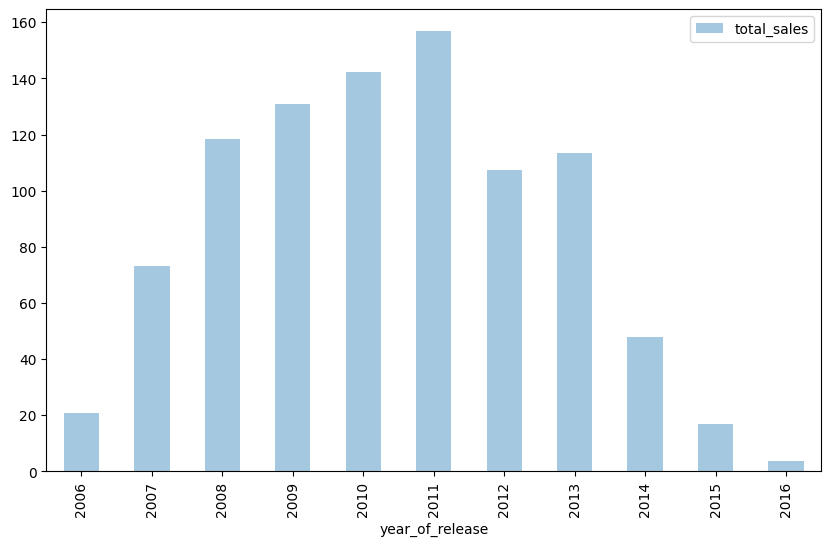

In [30]:
platform_pivot_ps3 = (
    data.query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PS3
platform_pivot_ps3.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PS3

In [31]:
platform_pivot_ps3 # Выведем конкретные числовые значения с продажами по годам платформы PS3

,year_of_release,total_sales
0,2006,20.96
1,2007,73.19
2,2008,118.52
3,2009,130.93
4,2010,142.17
5,2011,156.78
6,2012,107.36
7,2013,113.25
8,2014,47.76
9,2015,16.82


Исходя из полученных данных, время жизни данной платформы составляет около 11 лет. Наилучшие показатели продаж составили в 6 году существования данной платформы, а именно в 2011 году. Период значительного угасания продаж составляет примерно 3 года.

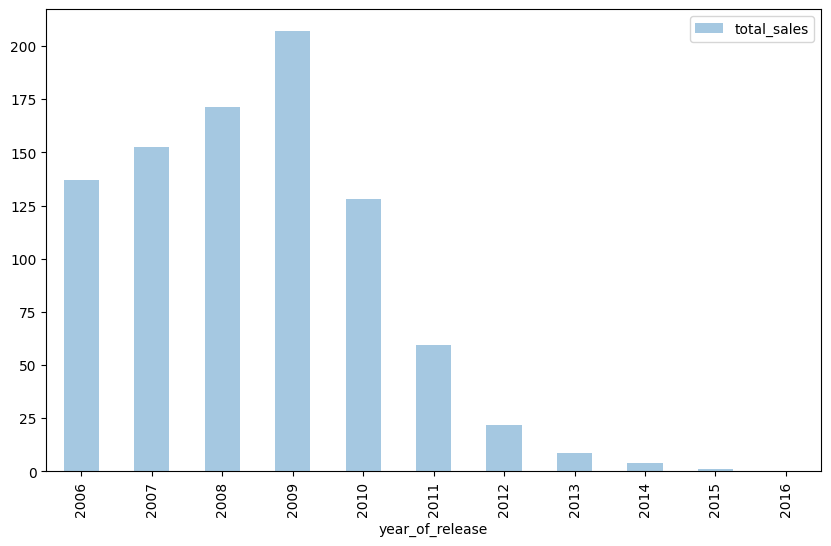

In [32]:
platform_pivot_wii = (
    data.query('platform == "Wii"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы Wii
platform_pivot_wii.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы Wii

In [33]:
platform_pivot_wii # Выведем конкретные числовые значения с продажами по годам платформы Wii

,year_of_release,total_sales
0,2006,137.15
1,2007,152.77
2,2008,171.32
3,2009,206.97
4,2010,127.95
5,2011,59.65
6,2012,21.71
7,2013,8.59
8,2014,3.75
9,2015,1.14


Исходя из полученных данных, время жизни данной платформы составляет около 11 лет. Наилучшие показатели продаж составили в 4 году существования данной платформы, а именно в 2009 году. Период значительного угасания продаж составляет примерно 6 лет.

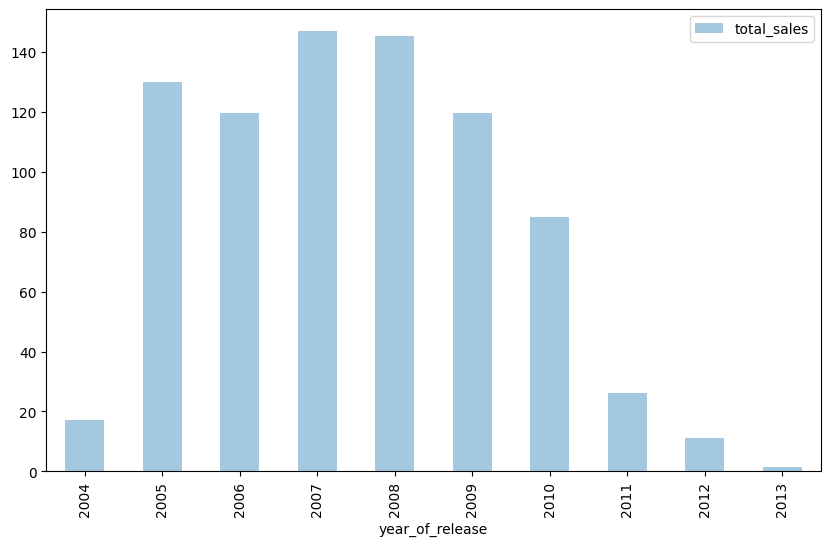

In [34]:
platform_pivot_ds = (
    data.query('platform == "DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы DS
platform_pivot_ds.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы DS

In [35]:
platform_pivot_ds # Выведем конкретные числовые значения с продажами по годам платформы DS

,year_of_release,total_sales
0,2004,17.27
1,2005,130.14
2,2006,119.81
3,2007,146.94
4,2008,145.31
5,2009,119.54
6,2010,85.02
7,2011,26.18
8,2012,11.01
9,2013,1.54


Исходя из полученных данных, время жизни данной платформы составляет около 10 лет, есть значение 1985 года, которое стоит отдельно от другох резульаьов и его лучше не считать. Наилучшие показатели продаж составили в 4 году существования данной платформы, а именно в 2007 году. Период значительного угасания продаж составляет примерно 3 года.

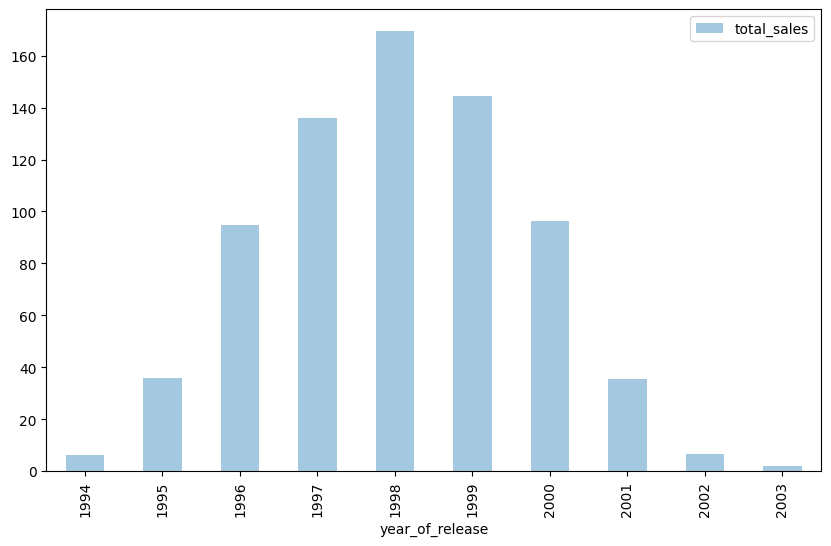

In [36]:
platform_pivot_ps = (
    data.query('platform == "PS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PS
platform_pivot_ps.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PS

In [37]:
platform_pivot_ps # Выведем конкретные числовые значения с продажами по годам платформы PS

,year_of_release,total_sales
0,1994,6.03
1,1995,35.96
2,1996,94.70
3,1997,136.17
4,1998,169.49
5,1999,144.53
6,2000,96.37
7,2001,35.59
8,2002,6.67
9,2003,2.07


Исходя из полученных данных, время жизни данной платформы составляет около 10 лет. Наилучшие показатели продаж составили в 5 году существования данной платформы, а именно в 1998 году. Период значительного угасания продаж составляет примерно 3 года.

Анализируя самые популярные игровые платформы можно сделать выводы, что примерное время их существования составляет от 10 до 12 лет. Время пика продаж игр на данные платформы составляет от 4 до 6 лет. Время появления новых платформ примерно совпадает со временем угасания продаж ранее популярной платформы. 

###  Возьмем данные за соответствующий актуальный период для прогноза на 2017 год

Исходя из сделанных ранее выводов, можно сделать вывод, что среднее время падения продаж после пика составляет примерно 4 года. Для прогноза на 2017 год возьмем данные за последние 4 года продаж. Сохраним данные в переменной data_actual.

In [38]:
data_actual = data.query('year_of_release >= 2013').reset_index(drop=True) 
# Создали переменную с актуальными данными для 2017 года

### Проанализируем, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Для начала узанем какие платфомы были в актуальные период.

In [39]:
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Проанализируем, какая платформа в данный период времени является лидером продаж. В переменной platform_total_sales_actual сохраним число продаж по платформам в актуальном периоле.

In [40]:
platform_total_sales_actual= data_actual.groupby('platform')['total_sales'].sum()

In [41]:
platform_total_sales_actual.sort_values(ascending = False) # Отсортируем занчения в порядке убывания

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

Как видим, лидером продаж в актуальном периоде является платформа PS4. Далее рассмотрим каждую платформу отдельно, чтобы понять продажи каких платформ растут, а каких падают.

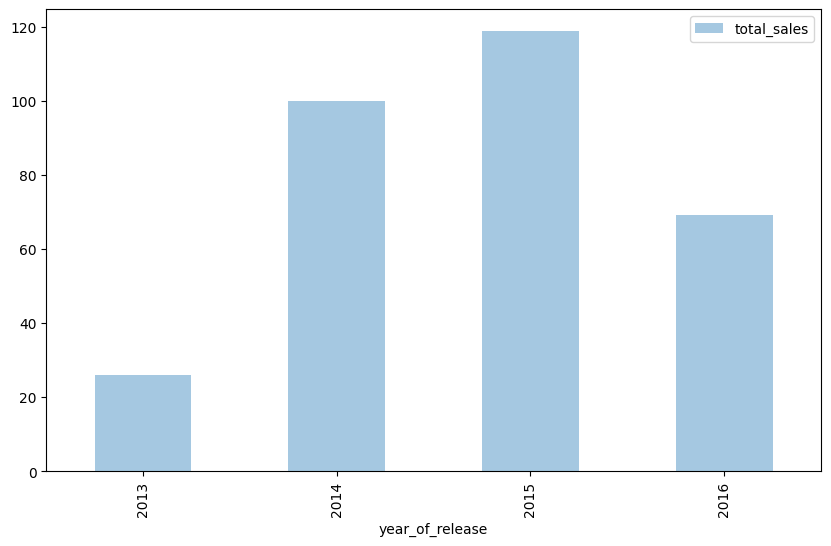

In [42]:
platform_pivot_ps4 = (
    data_actual.query('platform == "PS4"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PS4
platform_pivot_ps4.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PS4   

In [43]:
platform_pivot_ps4 # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,25.99
1,2014,100.00
2,2015,118.90
3,2016,69.25


Из данных видим, что данная платформа показывает динамичный рост к 2016 году. В описании к проекту говорилось, что данные за 2016 год могут быть не полными и из-за этого показатель в 2016 году может быть занижен. Можно сделать вывод, что если действительно данные в 2016 году не полные и сказались на данных о продажах в 2016 году, то к 2017 году данная платформа может быть перспективной и показать пик продаж.

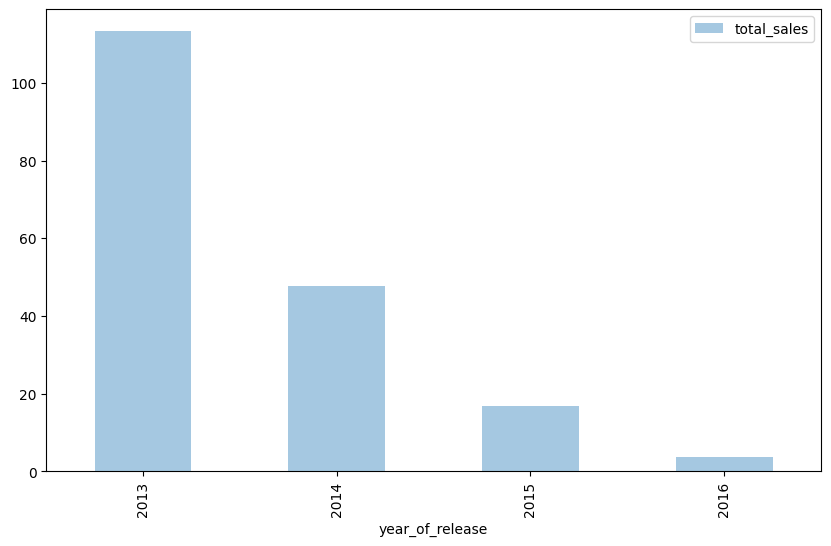

In [44]:
platform_pivot_ps3_1 = (
    data_actual.query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PS3
platform_pivot_ps3_1.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PS3   

In [45]:
platform_pivot_ps3_1 # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,113.25
1,2014,47.76
2,2015,16.82
3,2016,3.60


Из данных видим, что данная платформа показывает динамичный спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

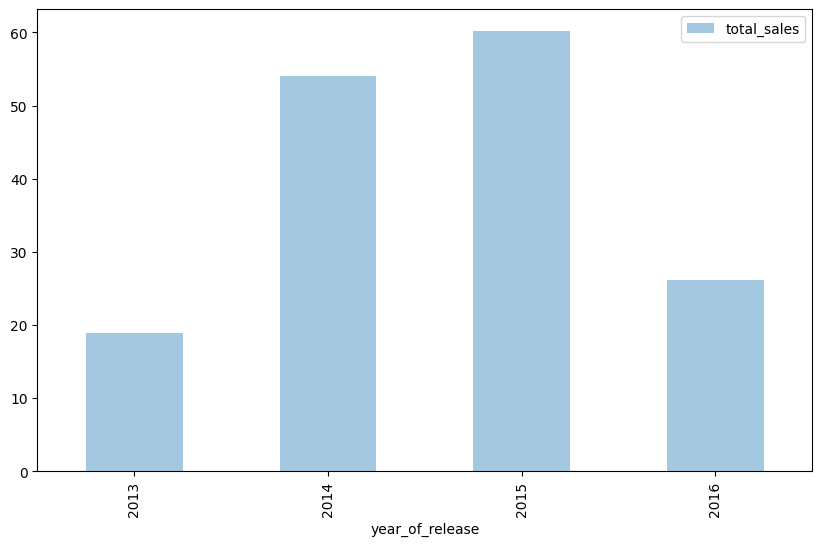

In [46]:
platform_pivot_xone = (
    data_actual.query('platform == "XOne"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы XOne
platform_pivot_xone.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы XOne

In [47]:
platform_pivot_xone # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,18.96
1,2014,54.07
2,2015,60.14
3,2016,26.15


Из данных видим, что данная платформа показывает динамичный рост к 2016 году. В описании к проекту говорилось, что данные за 2016 год могут быть не полными и из-за этого показатель в 2016 году может быть занижен. Можно сделать вывод, что если действительно данные в 2016 году не полные и сказались на данных о продажах в 2016 году, то к 2017 году данная платформа может быть перспективной и показать пик продаж.

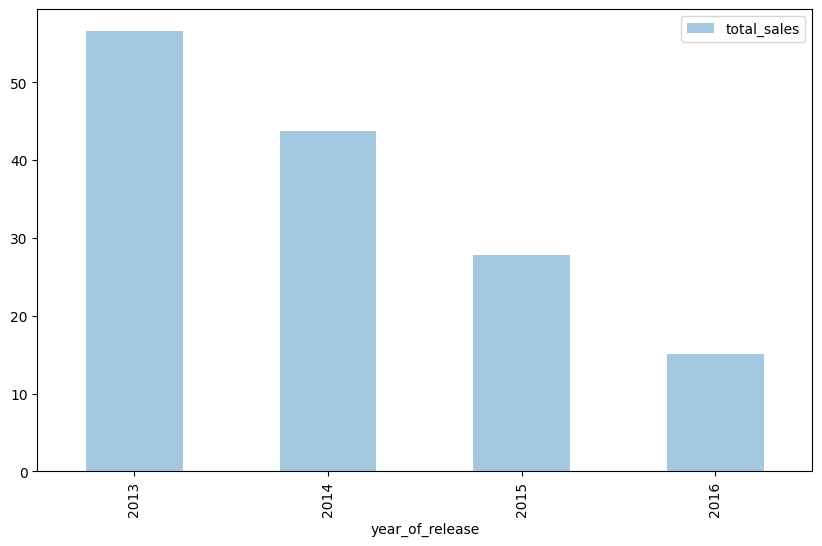

In [48]:
platform_pivot_3ds = (
    data_actual.query('platform == "3DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы 3DS
platform_pivot_3ds.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы 3DS 

In [49]:
platform_pivot_3ds # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,56.57
1,2014,43.76
2,2015,27.78
3,2016,15.14


Из данных видим, что данная платформа показывает динамичный спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

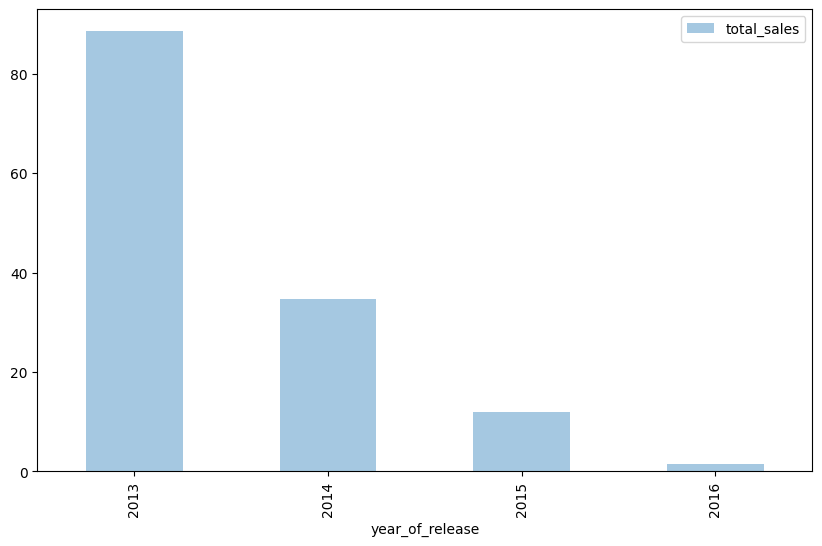

In [50]:
platform_pivot_x360_1 = (
    data_actual.query('platform == "X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы X360
platform_pivot_x360_1.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы X360  

In [51]:
platform_pivot_x360_1 # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,88.58
1,2014,34.74
2,2015,11.96
3,2016,1.52


Из данных видим, что данная платформа показывает динамичный спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

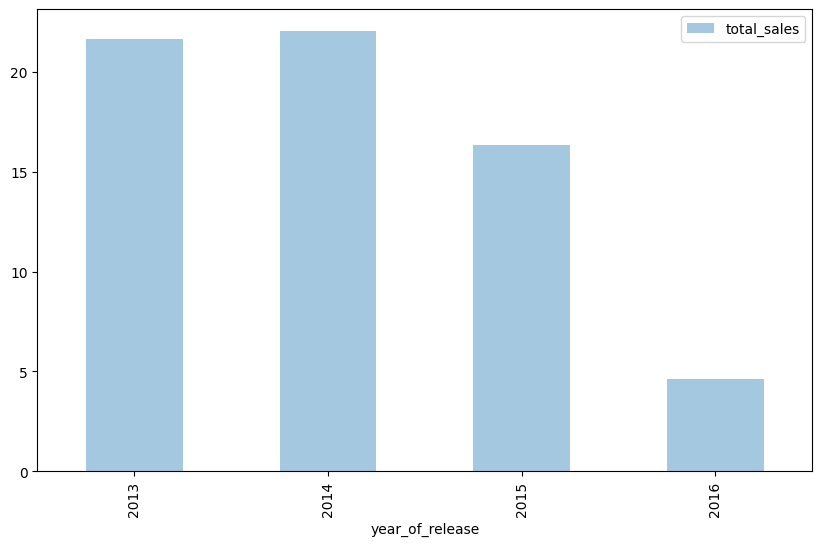

In [52]:
platform_pivot_wiiu = (
    data_actual.query('platform == "WiiU"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы WiiU
platform_pivot_wiiu.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы WiiU  

In [53]:
platform_pivot_wiiu # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,21.65
1,2014,22.03
2,2015,16.35
3,2016,4.60


Из данных видим, что данная платформа показывает спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

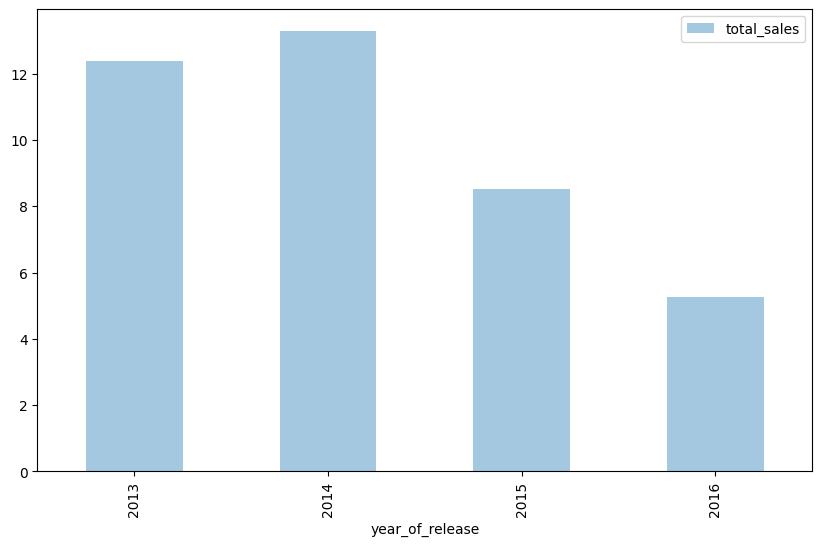

In [54]:
platform_pivot_pc = (
    data_actual.query('platform == "PC"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PC
platform_pivot_pc.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PC

In [55]:
platform_pivot_pc # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,12.38
1,2014,13.28
2,2015,8.52
3,2016,5.25


Из данных видим, что данная платформа показывает спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

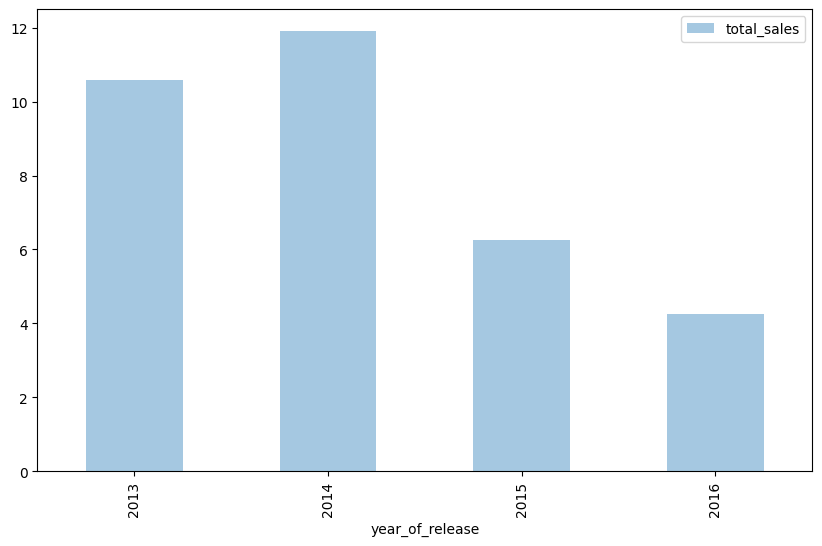

In [56]:
platform_pivot_psv = (
    data_actual.query('platform == "PSV"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PSV
platform_pivot_psv.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PSV

In [57]:
platform_pivot_psv # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,10.59
1,2014,11.90
2,2015,6.25
3,2016,4.25


Из данных видим, что данная платформа показывает спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

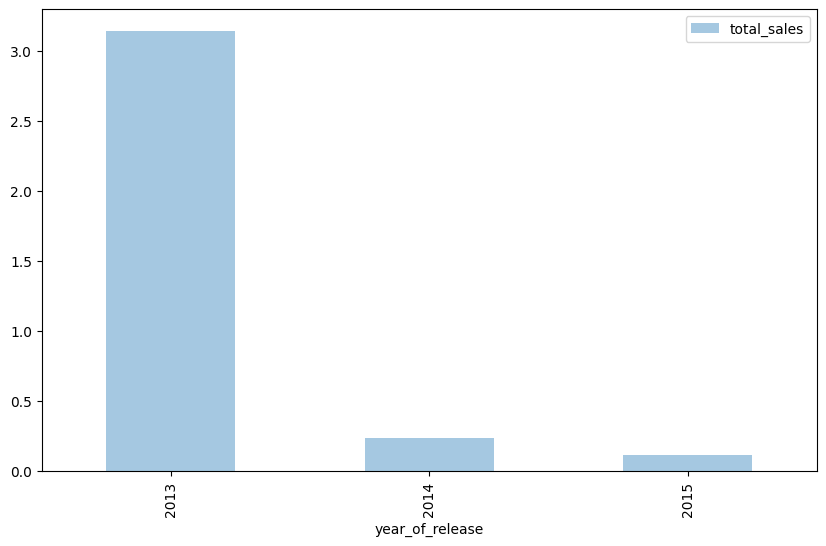

In [58]:
platform_pivot_psp = (
    data_actual.query('platform == "PSP"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
) # Расчитаем количество продаж по годам платформы PSP
platform_pivot_psp.plot(x='year_of_release', y='total_sales', kind='bar', alpha=0.4, figsize=(10,6));
# Выведем график с продажами по годам платформы PSP

In [59]:
platform_pivot_psp # Выведем числовые показатели по платформе

,year_of_release,total_sales
0,2013,3.14
1,2014,0.24
2,2015,0.12


Из данных видим, что данная платформа показывает спад к 2016 году. Можно сделать вывод, что данная платформа не перспективна к 2017 году.

Данные о платформа Wii и DS мы получили ранее в проводимом исследовании и к 2016 году у Wii спад в продажах, а у DS уже нет продаж.

Из полученных данных можно сделать вывод, что к 2017 году вероятнее всего перспективны будут такие платформы как XOne и PS4, а у остальных наблюдается четкое падение продаж. Самыми прибыльными в исследуемый период оказались платфорсы: PS4, PS3, XOne, 3DS, X360, WiiU.

###  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

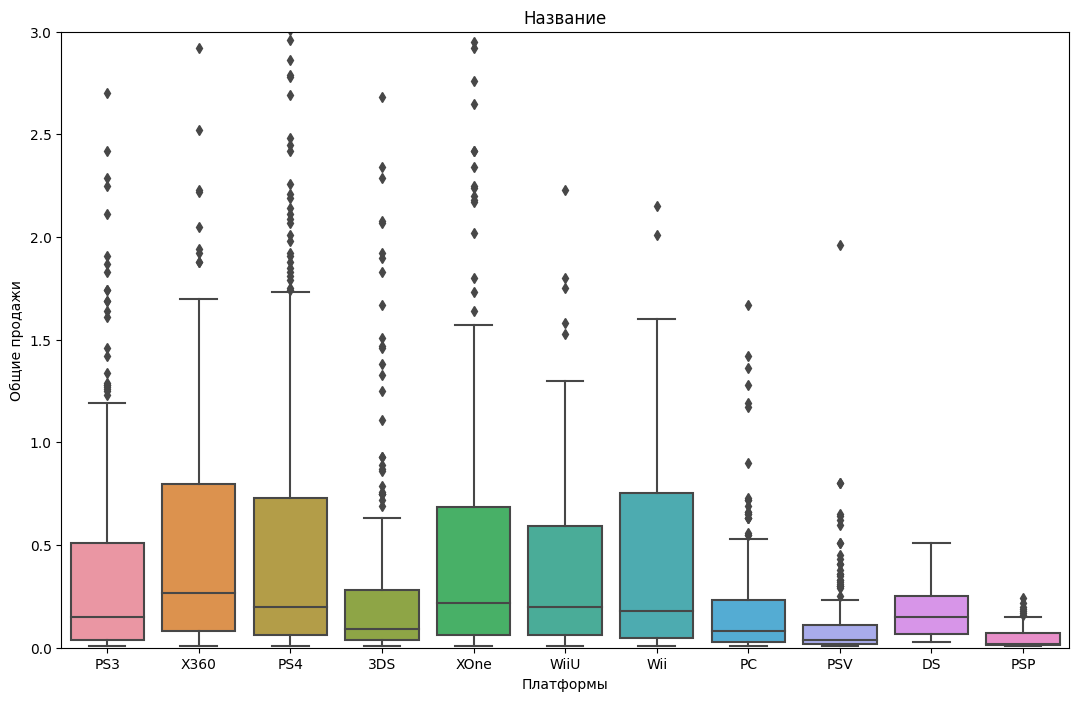

In [60]:
plt.figure(figsize=(13,8))
sns.boxplot(data=data_actual, x='platform', y='total_sales').set(title='Название', xlabel='Платформы', ylabel='Общие продажи', ylim=(0,3));

Сделаем более подробное числовое описание данных.

In [61]:
data_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Исходя из результатов основная масса продаж по платформам в актуалный период это мелкие по значению прождажи. Имеются большие по значению выбросы относительно среднего значения. Возможно эти продажи связаны с особой группой игр, которые пользовались на платформах особым успехом

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Возмем для рассмотрения влияния отзывов критиков и пользователей на продажи платформу PS4.

Сделаем срез данных по данной плтформе и сохраним его в переменной data_actual_ps4

In [62]:
data_actual_ps4 = data_actual.query('platform == "PS4"')

Построим для данной платформы диаграмму рассеивания для визуализации зависимости продаж от отзывов критиков и пользователей.

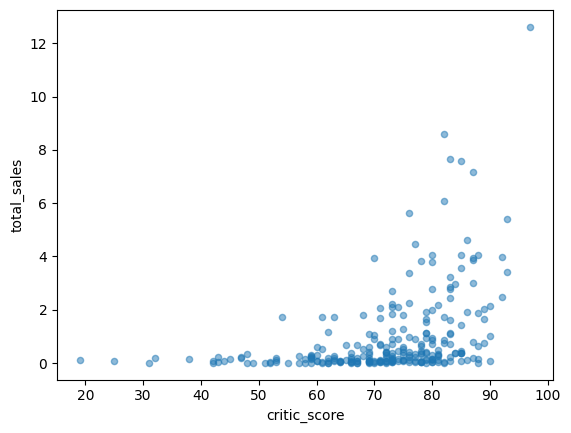

In [63]:
data_actual_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);
# Диаграмма рассеивания для отзывов критиков

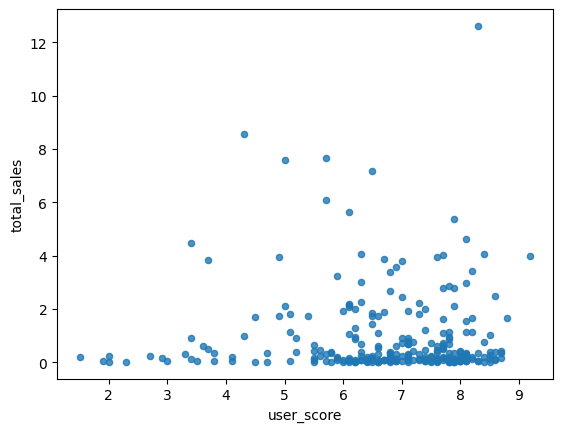

In [64]:
data_actual_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.8);
# Диаграмма рассеивания для отзывов критиков

Теперь посчитаем конкретные числовые значения корреляции отзывов критиков и пользователей.

In [65]:
data_actual_ps4['total_sales'].corr(data_actual_ps4['user_score']) # Расчитаем корреляцию для отзывов пользователей

-0.03195711020455643

In [66]:
data_actual_ps4['total_sales'].corr(data_actual_ps4['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.4065679020617816

Исходя из полученных данных можно сделать выводы, что оценки пользователей практически не влияют на продажи по данной платфоме. Оценки критиков влияют прямо пропорцианально на продажи, но это влияние не сильное.

### Соотнесем выводы с продажами игр на других платформах

Для того, чтобы соотнести выводы сделанные выше с продажами игр на других платформах возмем самые популярные за актуальный период. Это такие платформы как: PS3, XOne, 3DS, X360, WiiU. Узнаем зависимость продаж от оценки критиков и пользователей для данных платформ.

In [67]:
data_actual_ps3 = data_actual.query('platform == "PS3"') 
# Cрез данных по плтформе PS3, сохраним его в переменной data_actual_ps3

In [68]:
data_actual_ps3['total_sales'].corr(data_actual_ps3['user_score']) # Расчитаем корреляцию для отзывов пользователей

0.0023944027357566907

In [69]:
data_actual_ps3['total_sales'].corr(data_actual_ps3['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.3342853393371919

Для платформы PS3 выводы примерно такие же как и для выше проведенного исследования по PS4. Оценки ползователей практически не влияют на продажи, в то время как оценки критиков оказывают небольшое прямо пропорцианальное влияние.

In [70]:
data_actual_xone = data_actual.query('platform == "XOne"') 
# Cрез данных по плтформе XOne, сохраним его в переменной data_actual_xone

In [71]:
data_actual_xone['total_sales'].corr(data_actual_xone['user_score']) # Расчитаем корреляцию для отзывов пользователей

-0.06892505328279415

In [72]:
data_actual_xone['total_sales'].corr(data_actual_xone['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.41699832800840164

Для платформы XOne выводы примерно такие же как и для выше проведенного исследования по PS4. Оценки ползователей практически не влияют на продажи, в то время как оценки критиков оказывают небольшое прямо пропорцианальное влияние.

In [73]:
data_actual_3ds = data_actual.query('platform == "3DS"') 
# Cрез данных по плтформе 3DS, сохраним его в переменной data_actual_3ds

In [74]:
data_actual_3ds['total_sales'].corr(data_actual_3ds['user_score']) # Расчитаем корреляцию для отзывов пользователей

0.24150411773563016

In [75]:
data_actual_3ds['total_sales'].corr(data_actual_3ds['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.35705661422881035

Для платформы 3DS выводы выводы отличаются от выше проведенного исследования по PS4. Оценки ползователей, в отличие от других платформ, имеют более выраженное прямо пропорцианальное влияние, хоть это влияние и не велико. Оценки критиков так же оказывают небольшое прямо пропорцианальное влияние.

In [76]:
data_actual_x360 = data_actual.query('platform == "X360"') 
# Cрез данных по плтформе X360, сохраним его в переменной data_actual_X360 

In [77]:
data_actual_x360['total_sales'].corr(data_actual_x360['user_score']) # Расчитаем корреляцию для отзывов пользователей

-0.011742185147181351

In [78]:
data_actual_x360['total_sales'].corr(data_actual_x360['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.3503445460228664

Для платформы X360 выводы примерно такие же как и для выше проведенного исследования по PS4. Оценки ползователей практически не влияют на продажи, в то время как оценки критиков оказывают небольшое прямо пропорцианальное влияние.

In [79]:
data_actual_wiiu = data_actual.query('platform == "WiiU"') 
# Cрез данных по плтформе WiiU, сохраним его в переменной data_actual_wiiu

In [80]:
data_actual_wiiu['total_sales'].corr(data_actual_wiiu['user_score']) # Расчитаем корреляцию для отзывов пользователей

0.4193304819266187

In [81]:
data_actual_wiiu['total_sales'].corr(data_actual_wiiu['critic_score']) # Расчитаем корреляцию для отзывов критиков

0.3764149065423912

Для платформы WiiU выводы отличаются от выше проведенного исследования по PS4. Оценки ползователей, в отличие от других платформ, имеют наиболее выраженное прямо пропорцианальное влияние, хоть это влияние и не сильно велико. Оценки критиков так же оказывают небольшое прямо пропорцианальное влияние.

Из полученных данных можно сделать вывод, что у самых популярных платформ взятых в актуальный период, а именно с 2013 по 2016 год зависмость продаж от оценки критиков практически одинакова, она прямо пропорцианальна и при этом она не очень сильная. Оценки пользователей на платформах PS3, XOne, X360 практически не влияют на продажи, в то время как на платфомах WiiU и 3DS эта зависмость отличается, она заметно выше и имеет прямо пропоцианальную зависимость. При этом, хоть и зависимость прослеживается она все же не сильная

### Посмотрим на общее распределение игр по жанрам. 

Посмотрим, какие жанры игр выпускались чаще всего в актуальный период. Сохраним значения в переменной data_actual_genre

In [82]:
data_actual_genre = data_actual.groupby('genre')['name'].count()  # Получили значения по жанрам

In [83]:
data_actual_genre.sort_values(ascending=False) # Вывелили отсортированные значнеия

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Как видим, в указанный период больше всего игр выходило в жанре Action. Наименьшие показатели выхода игр у Puzzle.

Расчитаем теперь валовый показатель количество продаж в указанный период по жанрам.

In [84]:
data_actual_genre = data_actual.groupby('genre')['total_sales'].sum()

In [85]:
data_actual_genre.sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

Как видим, по валовому показателю количества продаж наибольший показатель у жанра Action а замыкает жанр Puzzle.

Теперь расчитаем средний показатель продаж по каждому жанру одной игры.

In [86]:
data_actual_genre = data_actual.groupby('genre')['total_sales'].median()

In [87]:
data_actual_genre.sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Как видим из данных, наилучший показатель продаж у жанра Shooter в то время как лидирующий по валовому количеству продаж жанр Action имеет почти в 4 раза меньший показатель. Замыкает медиальное количество продаж жанр Adventure.

Из анализа данных можно сделать выводы, что самым прибыльным жанром является Shooter. Так же высокие результаты показывает жанр Sports и Platform. Такие жанры как Role-Playing, Fighting, Racing, Action, Simulation, Misc, имеют примерно равную прибыльность и находятся примерно в середине. Наименее прибыльные жанры  Strategy,Puzzle, Adventure.

## Составим портрет пользователя каждого региона

### Определить самые популярные (топ-5) платформы для каждого региона (NA, EU, JP). Описать различия в долях продаж.

Сделаем группировку данных по платформам и узнаем сумму продаж каждой из них в заданном регионе. Определим значения для зоны NA и сохраним значения в переменной actual_platform_na.

In [88]:
actual_platform_na = data_actual.groupby('platform')['na_sales'].sum()

In [89]:
actual_platform_na.sort_values(ascending=False)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

Топ-5 игровых платформ для региона NA в порядке уменьшения популярности оказались: PS4, XOne, X360, PS3, 3DS.

Определим значения для зоны EU и сохраним значения в переменной actual_platform_eu.

In [90]:
actual_platform_eu = data_actual.groupby('platform')['eu_sales'].sum()

In [91]:
actual_platform_eu.sort_values(ascending=False)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

Топ-5 игровых платформ для региона EU в порядке уменьшения популярности оказались: PS4, PS3, XOne, X360, 3DS.

Определим значения для зоны JP и сохраним значения в переменной actual_platform_gp.

In [92]:
actual_platform_gp = data_actual.groupby('platform')['gp_sales'].sum()

In [93]:
actual_platform_gp.sort_values(ascending=False)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: gp_sales, dtype: float64

Топ-5 игровых платформ для региона JP в порядке уменьшения популярности оказались: 3DS, PS3, PSV, PS4, WiiU.

Для того , чтобы описать доли продаж необходимо узнать процентное соотношение самых популярных платформ в процентном соотношении по регионам с учетом имеющихся непопулярных платформ. 

Построим круговые диаграммы продаж платформ по регионам в процентах, для того чтобы было более наглядно воспринимать данные. В полученных нами суммарных данных по продажам платформ в отдельных регионах много платформ, чьи продажи несущественные. Объеденим их общим названием 'other'. Для каждого региона такие платформы разные. Для региона NA, в порядке уменьшения числа продаж, это 'WiiU', 'PC', 'Wii' , 'PSV', 'DS' , 'PSP'. Для региона EU,  в порядке уменьшения числа продаж, это 'PC', 'WiiU', 'PSV', 'Wii', 'DS', 'PSP'. Для региона JP,  в порядке уменьшения числа продаж, это 'PSP', 'X360', 'XOne', 'Wii', 'DS', 'PC'. 

Для того чтобы заменить значения непопулярных платформ сделаем срезы данных с названими платформ и количествами продаж по каждому региону. Для каждого региона сделаем отдельный срез.

In [94]:
data_actual_sales_na = data_actual.loc[:, ['platform', 'na_sales']] # Создали срез с данными для региона NA 

In [95]:
data_actual_sales_na.head() # Проверили данные

,platform,na_sales
0,PS3,7.02
1,X360,9.66
2,PS4,6.03
3,3DS,5.28
4,PS4,3.96


Заменим непопулярные платформы в регионе NA на 'other'

In [96]:
data_actual_sales_na = data_actual_sales_na.replace({'platform': {'WiiU': 'other', 'PC':'other', 'Wii' : 'other', 'PSV': 'other', 'DS' : 'other', 'PSP' : 'other'}})

In [97]:
data_actual_sales_na['platform'].unique() # Проверили замену платформ

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'other'], dtype=object)

In [98]:
data_actual_sales_na = data_actual_sales_na.groupby('platform')['na_sales'].sum() 
# Получили сумму всех продаж по платформам с учетом 'other'

Сделаем так же для регионов EU и JP.

In [99]:
data_actual_sales_eu = data_actual.loc[:, ['platform', 'eu_sales']] # Создали срез с данными для региона EU

In [100]:
data_actual_sales_eu.head() # Проверили данные

,platform,eu_sales
0,PS3,9.09
1,X360,5.14
2,PS4,5.86
3,3DS,4.19
4,PS4,6.31


In [101]:
data_actual_sales_eu = data_actual_sales_eu.replace({'platform':{'PC': 'other', 'WiiU':'other', 'PSV' : 'other', 'Wii': 'other', 'DS' : 'other', 'PSP' : 'other'}})

In [102]:
data_actual_sales_eu['platform'].unique() # Проверили замену платформ

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'other'], dtype=object)

In [103]:
data_actual_sales_eu = data_actual_sales_eu.groupby('platform')['eu_sales'].sum() 
# Получили сумму всех продаж по платформам с учетом 'other'

In [104]:
data_actual_sales_gp = data_actual.loc[:, ['platform', 'gp_sales']] # Создали срез с данными для региона JP

In [105]:
data_actual_sales_gp.head() # Проверили данные

,platform,gp_sales
0,PS3,0.98
1,X360,0.06
2,PS4,0.36
3,3DS,4.35
4,PS4,0.38


In [106]:
data_actual_sales_gp = data_actual_sales_gp.replace({'platform':{'PSP': 'other', 'X360':'other', 'XOne' : 'other', 'Wii': 'other', 'DS' : 'other', 'PC' : 'other'}})

In [107]:
data_actual_sales_gp['platform'].unique() # Проверили замену платформ

array(['PS3', 'other', 'PS4', '3DS', 'WiiU', 'PSV'], dtype=object)

In [108]:
data_actual_sales_gp = data_actual_sales_gp.groupby('platform')['gp_sales'].sum() 
# Получили сумму всех продаж по платформам с учетом 'other'

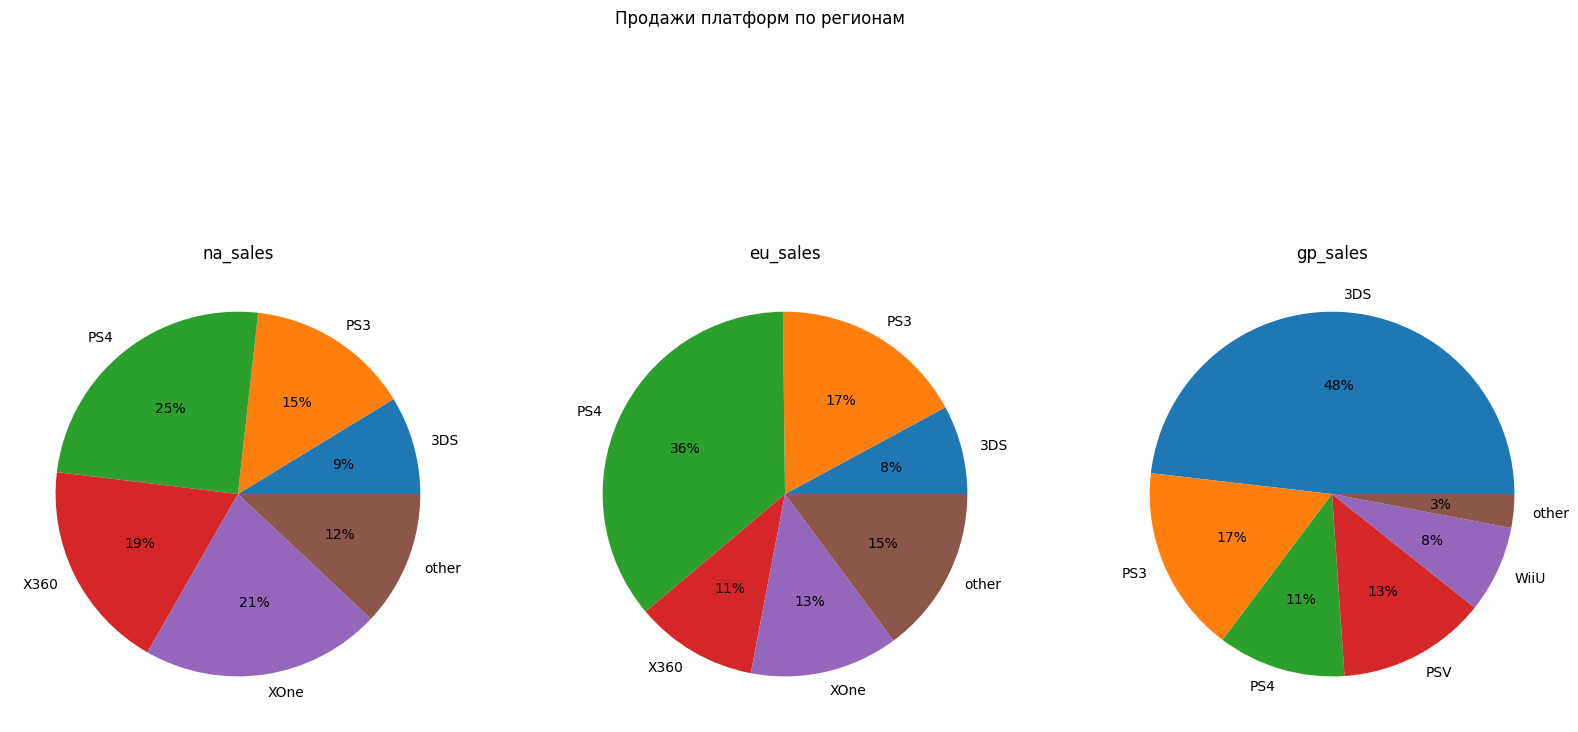

In [109]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10));
fig.suptitle('Продажи платформ по регионам')
ax1.pie(data_actual_sales_na, labels=data_actual_sales_na.index, autopct='%1.0f%%')
ax1.set_title('na_sales');
ax2.pie(data_actual_sales_eu, labels=data_actual_sales_eu.index, autopct='%1.0f%%')
ax2.set_title('eu_sales');
ax3.pie(data_actual_sales_gp, labels=data_actual_sales_gp.index, autopct='%1.0f%%')
ax3.set_title('gp_sales');

In [110]:
data_actual_sales_na

platform
3DS       38.20
PS3       63.50
PS4      108.74
X360      81.66
XOne      93.12
other     52.49
Name: na_sales, dtype: float64

Как видим, рынок игровых платформ Японии значительно отличается от Европы и Северной Амнрики. Практически половину рынка Японии составляет платформа 3DS, в то время как рынок Европы и Северной Америки не имеет настолько сильного лидера продаж. Лидер продаж в Северной Америке PS4 составляет 25% от общего рынка платформ. В Европе так же лидером продаж является PS4, у которого 36% продаж игр на их платформе. Возможно популярность 3DS в Японии вызвана тем, что ее выпускают в этой же стране и она компактна в отличие от PS4, что учитывая жизнь в Японии более удобно.

### Определим самые популярные жанры (топ-5). Пояснить разницу.

Сделаем группировку данных по жанрам и узнаем сумму продаж по каждому из них в заданном регионе. Определим значения для зоны NA и сохраним значения в переменной actual_genre_na.

In [111]:
actual_genre_na = data_actual.groupby('genre')['na_sales'].sum()

In [112]:
actual_genre_na.sort_values(ascending = False) # Выведем значения 

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

Топ-5 жанров игр для региона NA по убыванию количества продаж: Action, Shooter, Sports, Role-Playing, Misc.

Определим значения для зоны EU и сохраним значения в переменной actual_genre_eu.

In [113]:
actual_genre_eu = data_actual.groupby('genre')['eu_sales'].sum()

In [114]:
actual_genre_eu.sort_values(ascending = False) # Выведем значени

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

Топ-5 жанров игр для региона EA по убыванию количества продаж: Action, Shooter, Sports, Role-Playing, Racing .

Определим значения для зоны JP и сохраним значения в переменной actual_genre_gp.

In [115]:
actual_genre_gp = data_actual.groupby('genre')['gp_sales'].sum()

In [116]:
actual_genre_gp.sort_values(ascending = False) # Выведем значени

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: gp_sales, dtype: float64

Топ-5 жанров игр для региона JP по убыванию количества продаж: Role-Playing, Action, Misc, Fighting, Shooter. 

Из данных можно сделать вывод, что регионы NA и EU схожи в жанровых предпочтениях. У них основную массу продаж составляют 3 жанра, это: Action, Shooter, Sports. В регионе JP подавляющее количество продаж составли 2 жанра: Role-Playing, Action. Такая разница в игровых предпочтениях возможно связана с культурной и ментальной разницей населения в регионах.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Узнаем для начала какие рейтинги самые популярные в разных регионах. Так как в столбце rating есть пропущенные значения заменим их на значение unknown

In [117]:
data_actual['rating'] = data_actual['rating'].fillna('unknown')

Определим значения количества игр по рейтингу и число их продаж для зоны NA и сохраним значения в переменной actual_rating_na.

In [118]:
actual_rating_na = data_actual.pivot_table(index='rating', values='na_sales', aggfunc=['count', 'sum'])

In [119]:
actual_rating_na.sort_values(by=('count','na_sales'), ascending=False)

,count,sum
,na_sales,na_sales
rating,,
unknown,977,89.42
M,369,165.21
T,333,49.79
E,302,79.05
E10+,252,54.24


Как видим, больше всего количества игр с рейтингом unknown. Однако больше всего продаж игр в регионе NA с рейтингом M. Определим теперь влияние рейтинга на продажи через зависимость количества игр с данным рейтингом от общего количества продаж игр соответствующих данному рейтингу.

In [120]:
actual_rating_na.corr()

,,count,sum
,,na_sales,na_sales
count,na_sales,1.00000,0.12506
sum,na_sales,0.12506,1.00000


Можно заметить прямую зависисмоть ретинга игр от их продаж, но эта зависимость крайне мала.

Теперь определим значения количества игр по рейтингу и число их продаж для зоны EU и сохраним значения в переменной actual_rating_eu

In [121]:
actual_rating_eu = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc=['count', 'sum'])

In [122]:
actual_rating_eu.sort_values(by=('count','eu_sales'), ascending=False)

,count,sum
,eu_sales,eu_sales
rating,,
unknown,977,78.91
M,369,145.32
T,333,41.95
E,302,83.36
E10+,252,42.69


Больше всего продаж игр в регионе EU с рейтингом M. Определим теперь влияние рейтинга на продажи через зависимость количества игр с данным рейтингом от общего количества продаж игр соответствующих данному рейтингу.

In [123]:
actual_rating_eu.corr()

,,count,sum
,,eu_sales,eu_sales
count,eu_sales,1.000000,0.107896
sum,eu_sales,0.107896,1.000000


Можно заметить прямую зависисмоть ретинга игр от их продаж, но эта зависимость крайне мала.

Теперь определим значения количества игр по рейтингу и число их продаж для зоны JP и сохраним значения в переменной actual_rating_gp

In [124]:
actual_rating_gp = data_actual.pivot_table(index='rating', values='gp_sales', aggfunc=['count', 'sum'])

In [125]:
actual_rating_gp.sort_values(by=('count','gp_sales'), ascending=False)

,count,sum
,gp_sales,gp_sales
rating,,
unknown,977,85.05
M,369,14.11
T,333,20.59
E,302,15.14
E10+,252,5.89


Больше всего продаж игр в регионе JP с рейтингом unknown.

Исходя из того, что большая часть продаж составили игры у которых рейтинг неизвестен, для данного региона невозможно даже примерно узнать зависисмоть продаж от рейтинга ESRB. Скорее всего в данном регионе есть свой собственный рейтинг игр.

Из проведенного анализа можно сделать выводы, что критерии рейтинга ESRB в регионе NA и EU схожи. И там и там самые продаваемы е игры с ретингом M. Так же можно сказать, что данный рейтинг практически не сказывается на продажах в данных регионах. В регионе JP самыми продаваемыми играми оказались с неизвестным рейтингом. Скорее всего это говорит, что в данном регионе есть свой собственный рейтинг и рейтинг ESRB не особо влияет там на продажи. 

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [126]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,gp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Для того, чтобы узнать одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC сделаем срезы данных из data_actual для каждой из платформ.

In [127]:
data_actual_xone = data_actual.query('platform == "XOne"') 
# Сделали срез для XOne и сохранили в переменную data_actual_xone

Теперь удалим пропуски в столбце user_score.

In [128]:
data_actual_xone = data_actual_xone.dropna(subset=['user_score']).reset_index(drop=True)

In [129]:
data_actual_pc = data_actual.query('platform == "PC"') # Сделали срез для PC и сохранили в переменную data_actual_pc

Теперь удалим пропуски в столбце user_score.

In [130]:
data_actual_pc = data_actual_pc.dropna(subset=['user_score']).reset_index(drop=True)

Сформулируем гипотезы. Нулевая гипотеза звучит: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернатиная гипротеза звучит: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые. Альтернативная гипотеза должна противоречить нулевой гипотезе поэтому была выбрана именна такая альтернативная гипотеза. Для проверки данных гипотез мы применили следующие критерии. Данные выборки независимы друг от друга, так как оценки пользователей PC не оказывают влияния на оценки пользователей XOne. Так же у нас есть основание полагать, что дисперсии генеральных совокупностей разные. Поэтому при проверк гипотез мы применим параметр equal_var = False.

Проверим гипотезы.

In [131]:
from scipy import stats as st
import numpy as np
xone = data_actual_xone[data_actual_xone['platform'] == 'XOne']['user_score'] # Сделаем срез с нужными значениями
pc = data_actual_pc[data_actual_pc['platform'] == 'PC']['user_score'] # Сделаем срез с нужными значениями
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(xone, pc, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Отвергуть нулевую гипотезу не получилось. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для того, чтобы узнать одинаковы ли средние пользовательские рейтинги жанров Action и Sports сделаем срезы данных из data_actual для каждого из жанров.

In [132]:
data_actual_action = data_actual.query('genre == "Action"') # Срез с данными по жанру "Action"

Теперь удалим пропуски в столбце user_score.

In [133]:
data_actual_action = data_actual_action.dropna(subset=['user_score']).reset_index(drop=True)

In [134]:
data_actual_sports = data_actual.query('genre == "Sports"') # Срез с данными по жанру "Sports"

Теперь удалим пропуски в столбце user_score.

In [135]:
data_actual_sports = data_actual_sports.dropna(subset=['user_score']).reset_index(drop=True)

Сформулируем гипотезы. Нулевая гипотеза звучит: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Альтернатиная гипротеза звучит:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная гипотеза должна противоречить нулевой гипотезе поэтому была выбрана именна такая альтернативная гипотеза. Для проверки данных гипотез мы применили следующие критерии. Данные выборки независимы друг от друга, так как оценки пользователей жанра Action не оказывают влияния на оценки пользователей жанра Sports. Так же у нас есть основание полагать, что дисперсии генеральных совокупностей разные. Поэтому при проверк гипотез мы применим параметр equal_var = False.

Проверим гипотезы.

In [136]:
from scipy import stats as st
import numpy as np
action = data_actual_action[data_actual_action['genre'] == 'Action']['user_score'] # Сделаем срез с нужными значениями
sports = data_actual_sports[data_actual_sports['genre'] == 'Sports']['user_score'] # Сделаем срез с нужными значениями
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.

## Общий вывод

Выполняя спринт, были проделаны следующие работы:  
1. Подготовлены данные, а именно:  
* заменены названия столбцов (приведены к нижнему регистру);  
* преобразованы данные в нужные типы, описано, в каких столбцах заменили тип данных и почему;  
* обработаны пропуски, объяснено, почему заполнили пропуски определённым образом или почему не стали это делать, описаны причины, которые могли привести к пропускам, отдельно разобрано значение   'tbd' и описано, как его обработать;  
* посчитаны суммарные продажи во всех регионах и записали их в отдельный столбец.  
2. Проведен исследовательский анализ данных, а именно:  
* просмотрено, сколько игр выпускалось в разные годы;  
* рассмотрено, как менялись продажи по платформам;  
* взяты данные за соответствующий актуальный период для 2017 года;  
* определены платформы, лидирующие по продажам, а так же какие платформы растущие или падающие по продажам; 
* выбраны несколько потенциально прибыльных платформ;  
* построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описан результат;  
* просмотрено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;  
* построена диаграмму рассеяния и посчитана корреляцию между отзывами и продажами;  
* сформулированы выводы по самой продаваемой платформе;  
* соотнесены выводы с продажами игр на других платформах;  
* рассмотрено общее распределение игр по жанрам; 
* выведены самые прибыльные жанры; 
* выделены жанры с высокими и низкими продажами.  
3. Составлен портрет пользователя каждого региона (NA, EU, JP), а именно:  
* выявлены самые популярные платформы (топ-5);  
* описаны различия в долях продаж;  
* выявлены самые популярные жанры (топ-5);  
* пояснена разница в жанровых предпочтениях; 
* выявлено влияние рейтинга ESRB на продажи в отдельном регионе.  
4. Проверены гипотезы, а именно:  
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Из анализа данных сделаны следующе выводы.  
1. За период с 1980 по 1993 год количество игр от общего и количества составило чуть более 2%. Данные при исследовании до 1994 года включительно можно не использовать, так как не будет сильно влиять на результат исследования. В период с 1994 по 2016 год включительно значительно выделяются от среднего показателя продаж такие платформы как: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Данные платформы расположены в порядке убывания количества продаж в отведенный период. 
2. Анализируя самые популярные игровые платформы можно сделать выводы, что примерное время их существования составляет от 10 до 12 лет. Время пика продаж игр на данные платформы составляет от 4 до 6 лет. Время появления новых платформ примерно совпадает со временем угасания продаж ранее популярной платформы.  
3. Для прогноза на 2017 год, на основе ранее сделанных выводов, взяли данные за последние 4 года продаж, так как это актуальный период для данного года.  
4. К 2017 году вероятнее всего перспективны будут такие платформы как XOne и PS4, а у остальных наблюдается четкое падение продаж. Самыми прибыльными в исследуемый период оказались платформы: PS4, PS3, XOne, 3DS, X360, WiiU.  
5. Исходя из результатов исследования основная масса продаж по вышеуказанным платформам в актуальный период это мелкие по значению продажи от 0,08 млн. продаж до 0,265 млн. продаж. Имеются большие по значению выбросы относительно среднего значения. Возможно эти продажи связаны с особой группой игр, которые пользовались на платформах особым успехом. 
6. Взяв самую популярную платформу PS4 в актуальный период, установили, что оценки пользователей практически не влияют на продажи по данной платформе. Оценки критиков влияют прямо пропорционально на продажи, но это влияние не сильное.  
7. Соотнеся ранее сделанные выводы по самой популярной платформе PS4, с выводами по другим платформам установили, что зависимость продаж от оценки критиков практически одинакова, она прямо пропорциональна и при этом она не очень сильная. Оценки пользователей на платформах PS3, XOne, X360 практически не влияют на продажи, в то время как на платформах WiiU и 3DS эта зависимость отличается, она заметно выше и имеет прямо пропорциональную зависимость. При этом, хоть и зависимость прослеживается она все же не сильная.  
8. Из анализа жанров игр в актуальный период можно сделать выводы, что самым прибыльным жанром является Shooter. Так же высокие результаты показывает жанр Sports и Platform. Такие жанры как Role-Playing, Fighting, Racing, Action, Simulation, Misc, имеют примерно равную прибыльность и находятся примерно в середине. Наименее прибыльные жанры Strategy,Puzzle, Adventure.  
9. При анализе рынков разных регионов было установлено, рынок игровых платформ Японии значительно отличается от Европы и Северной Америки. Практически половину рынка, а именно 48 %, в Японии составляет платформа 3DS, в то время как рынок Европы и Северной Америки не имеет настолько сильного лидера продаж. Лидер продаж в Северной Америке PS4 составляет 25% от общего рынка платформ. В Европе так же лидером продаж является PS4, у которого 36% продаж игр на их платформе. Возможно популярность 3DS в Японии вызвана тем, что ее выпускают в этой же стране и она компактна в отличие от PS4, что, учитывая жизнь в Японии более удобно.  
10. При анализе жанров по регионам было установлено, что регионы NA и EU схожи в жанровых предпочтениях. У них основную массу продаж составляют 3 жанра, это: Action, Shooter, Sports. В регионе JP подавляющее количество продаж составили 2 жанра: Role-Playing, Action. Такая разница в игровых предпочтениях возможно связана с культурной и ментальной разницей населения в регионах.  
11. При анализе влияния рейтинга ESRB сделаны выводы, что критерии рейтинга ESRB в регионе NA и EU схожи. И там и там самые продаваемые игры с рейтингом M. Так же можно сказать, что данный рейтинг ESRB практически не сказывается на продажах в данных регионах. В регионе JP самыми продаваемыми играми оказались с неизвестным рейтингом. Скорее всего это говорит, что в данном регионе есть свой собственный рейтинг и рейтинг ESRB не особо влияет там на продажи.  
12. При проверке гипотез, таких как: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные были сделаны выводы, что первую гипотезу отвергнуть не получилось, в то время как вторую гипотезу мы отвергли.